In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
nome_da_base = 'noronha_retorno'
data=pd.read_excel('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Bases\\'+ nome_da_base + '.xlsx',engine='openpyxl')
data


,Noronha,IHFA,IFMM,IMAB,IBX
0,0.003327,0.002141,0.001242,0.009594,0.019649
1,0.004127,0.004757,0.003235,0.005683,0.026115
2,0.002750,0.003109,0.002617,0.002244,0.016567
3,0.004521,0.005013,0.004669,0.015946,0.002738
4,-0.004714,-0.006748,-0.005594,-0.015706,-0.024610
...,...,...,...,...,...
137,0.003489,0.007037,0.006886,0.014963,0.023246
138,0.001502,-0.001337,-0.000853,-0.009201,-0.031072
139,0.002154,-0.002431,-0.002239,0.004174,-0.023145
140,0.004066,0.002189,0.000755,0.001611,-0.028345


In [14]:
scaled_data = preprocessing.scale(data.T)



In [19]:
#C
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

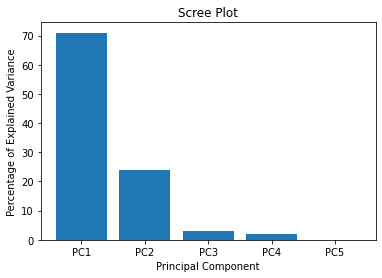

In [28]:
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var,tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [30]:
pca_df.PC1

Noronha    -6.818312
IHFA       -4.037133
IFMM       -5.425383
IMAB       -3.680149
IBX        19.960977
Name: PC1, dtype: float64

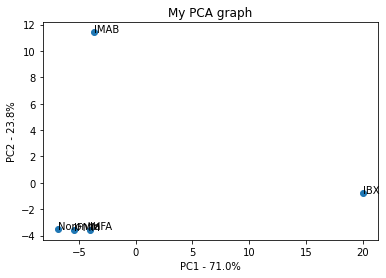

In [34]:
pca_df = pd.DataFrame(pca_data,index = data.columns.values , columns=labels)
plt.scatter(pca_df.PC1 , pca_df.PC2)
plt.title('My PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#plt.zlabel('PC3 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample] ,pca_df.PC2.loc[sample] ))
plt.show()

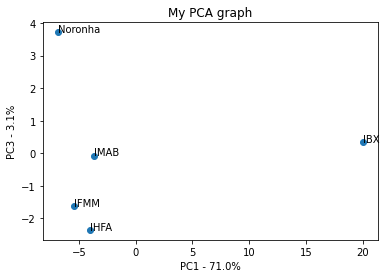

In [35]:
pca_df = pd.DataFrame(pca_data,index = data.columns.values , columns=labels)
plt.scatter(pca_df.PC1 , pca_df.PC3)
plt.title('My PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
#plt.zlabel('PC3 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample] ,pca_df.PC3.loc[sample] ))
plt.show()

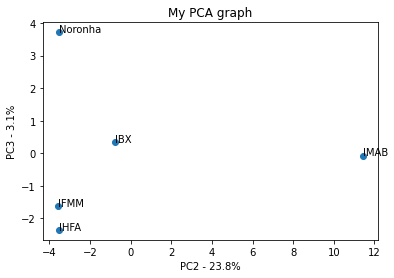

In [36]:
pca_df = pd.DataFrame(pca_data,index = data.columns.values , columns=labels)
plt.scatter(pca_df.PC2 , pca_df.PC3)
plt.title('My PCA graph')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
#plt.zlabel('PC3 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC2.loc[sample] ,pca_df.PC3.loc[sample] ))
plt.show()

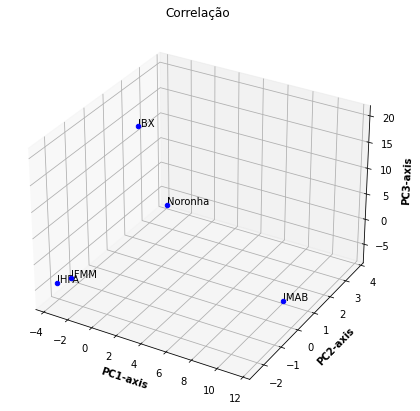

In [54]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = pca_df.PC1
x = pca_df.PC2
y = pca_df.PC3
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
#ax.scatter3D(x, y, z, color = "green")
for sample in pca_df.index:
    ax.scatter(x[sample],y[sample],z[sample],color='b') 
    ax.text(x[sample],y[sample],z[sample],  '%s' % sample, size=10, zorder=1, color='k') 
 

plt.title("Correlação")
ax.set_xlabel('PC1-axis', fontweight ='bold')
ax.set_ylabel('PC2-axis', fontweight ='bold')
ax.set_zlabel('PC3-axis', fontweight ='bold')

# show plot
plt.show()